### Урок 2. Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных#

### -- Автор: Шенк Евгений Станиславович

In [1]:
import math

### Задание 1.

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [2]:
Salary = (100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150)
Salary

(100,
 80,
 75,
 77,
 89,
 33,
 45,
 25,
 65,
 17,
 30,
 230,
 24,
 57,
 55,
 70,
 75,
 65,
 84,
 90,
 150)

In [3]:
# среднее арифметическое
S_mean = sum(Salary) / len(Salary)
S_mean

73.14285714285714

смещенная оценка дисперсии
$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$$

In [4]:
S_d2 = sum([(x - S_mean)**2 for x in Salary]) / len(Salary)
S_d2

2135.074829931973

несмещенная оценка дисперсии
$$\sigma_{unbiased}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$$

In [5]:
S_d2_unbiased = sum([(x - S_mean)**2 for x in Salary]) / (len(Salary) - 1)
S_d2_unbiased 

2241.8285714285716

среднее квадратичное отклонение
$$\sigma =  \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2}, \:\:
\sigma_{unbiased} = \sqrt{\dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2}$$

In [6]:
S_d = math.sqrt(sum([(x - S_mean)**2 for x in Salary]) / len(Salary))
S_d

46.20686994302874

In [7]:
S_d_unbiased = math.sqrt(sum([(x - S_mean)**2 for x in Salary]) / (len(Salary) - 1))
S_d_unbiased

47.34795213553139

### Проверка

In [8]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

In [9]:
Salary_test = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])
Salary_test

array([100,  80,  75,  77,  89,  33,  45,  25,  65,  17,  30, 230,  24,
        57,  55,  70,  75,  65,  84,  90, 150])

In [10]:
Salary_test.mean()

73.14285714285714

In [11]:
Salary_test.var()

2135.0748299319725

In [12]:
Salary_test.var(ddof=1)

2241.828571428571

In [13]:
Salary_test.std()

46.206869943028735

In [14]:
Salary_test.std(ddof=1)

47.347952135531386

### Задание 2.

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [15]:
Salary = (100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150)

In [16]:
if len(Salary) % 4 == 0:
    q1 = (sorted(Salary)[int(len(Salary)*0.25)] + sorted(Salary)[int(len(Salary)*0.25) - 1]) / 2
    q3 = (sorted(Salary)[int(len(Salary)*0.75)] + sorted(Salary)[int(len(Salary)*0.75) - 1]) / 2
else:
    q1 = sorted(Salary)[int(len(Salary)*0.25)]
    q3 = sorted(Salary)[int(len(Salary)*0.75)]
if len(Salary) % 2 == 0:
    q2 = (sorted(Salary)[int(len(Salary)*0.50)] + sorted(Salary)[int(len(Salary)*0.50) - 1]) / 2
else:
    q2 = sorted(Salary)[int(len(Salary)*0.50)]

In [17]:
q1, q2, q3

(45, 70, 84)

In [18]:
# интерквартильное расстояние
iqr = q3 - q1
iqr

39

In [19]:
S_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
S_range

(-13.5, 142.5)

In [20]:
# выбросы в выборке
outliers = [x for x in Salary if (x < S_range[0] or x > S_range[1])]
outliers

[230, 150]

### Проверка

In [21]:
Salary_test = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [22]:
np.quantile(Salary_test, .25, interpolation='midpoint')

45.0

In [23]:
np.quantile(Salary_test, .50, interpolation='midpoint')

70.0

In [24]:
np.quantile(Salary_test, .75, interpolation='midpoint')

84.0

{'whiskers': [<matplotlib.lines.Line2D at 0x27bccb5cf98>,
 'caps': [<matplotlib.lines.Line2D at 0x27bcd1ecf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x27bcd1ec4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x27bcd2056a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27bcd205a20>],
 'means': []}

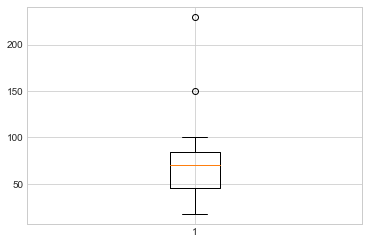

In [25]:
plt.boxplot(Salary_test)

### Задание 3.

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Событие A - студент сдал

Событие B - студент поступил

$$P(A|B_1) = 0.8$$
$$P(A|B_2) = 0.7$$
$$P(A|B_3) = 0.9$$

$$P(B|A) = \frac{P(A|B) \cdot P(B)}{P(A)}.$$

Если считаем, что требования для попадания на каждый факультет одинаковые, то вероятность P(B_i) будем считать в зависимости от доступных мест:
$$P(B_1) =  1/4$$
$$P(B_2) =  1/4$$
$$P(B_3) =  1/2$$

$$P(A) = P(A | B_1) \cdot P(B_1) + P(A | B_2) \cdot P(B_2) + P(A | B_3) \cdot P(B_3).$$

In [26]:
P_A = 0.8 * 0.25 + 0.7 * 0.25 + 0.9 * 0.5
P_A

0.825

вероятность, что он учится: a) на факультете A?
$$P(B_1|A) = \frac{P(A|B_1) \cdot P(B_1)}{P(A)}.$$

In [27]:
p_1 = 0.8 * 0.25 / P_A
p_1

0.24242424242424246

вероятность, что он учится: б) на факультете B?
$$P(B_2|A) = \frac{P(A|B_2) \cdot P(B_2)}{P(A)}.$$

In [28]:
p_2 = 0.7 * 0.25 / P_A
p_2

0.21212121212121213

вероятность, что он учится: в) на факультете C?
$$P(B_3|A) = \frac{P(A|B_3) \cdot P(B_3)}{P(A)}.$$

In [29]:
p_3 = 0.9 * 0.5 / P_A
p_3

0.5454545454545455

Проверка:

In [30]:
p_1 + p_2 + p_3

1.0